In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import parzenFunction as pz
import math
%matplotlib inline

# O teste usará os dados do dataset Iris

In [4]:

# assumindo que a distribuição é gaussiana, o calculo de H = 1.06 * desvioPadrao * numeroExemplosTreino^-1/5
# slide Francisco, pagina 18
def encontrarH(npColuna):
    coeficiente = -1.0 / 5
    h = 1.06 * np.std(npColuna) * len(npColuna)**(coeficiente)
    return h


# recebe uma matriz de dados e encontra a largura da janela (h) para cada coluna (característica)
# retorna um array contendo os coeficiente, onde cada elemento i representa o H da coluna j da matriz
def encontrarHDimensoes(matriz):
    hDimensoes = []
    colunas = len(matriz[0])
    # para cada coluna...
    for i in range(colunas):
        npColuna = np.array(matriz[:,i:i+1])
        h = encontrarH(npColuna)
        hDimensoes.append(h)
    return hDimensoes


# função kernel univariada normal - slide "Tecnicas nao parametricas", pg 13    
def funcaoKernelUnivariadaNormal(u):
    return (1.0/ math.sqrt(2 * math.pi)) * math.exp(- (u**2)/2)



# features = array com os valores para o qual deseja-se encontrar o valor da função densidade em uma determinada classe.
#            o numero de elementos deve ser igual ao numero de colunas da matriz
# indiceColunaFeature = feature observada (coluna da matriz)
# pdMatriz = matriz (pandas) que contem todas as features(colunas) das amostras(linhas) de uma determinada classe
# arrayH - array contendo o valor H (janela) para todas as colunas da matriz. A função encontrarHDimensoes() faz isso.
def parzenMultivariadoProduto(features, pdMatriz, arrayH):
    n = len(pdMatriz)
    soma = 0
    # p = numero de colunas, dimensoes
    p = len(pdMatriz[0])  
    for i in range(n):
        produto = 1
        for j in range(p):
            coluna = np.array(pdMatriz[ : , j:j+1])
            h = arrayH[j]
            u = (features[j] - pdMatriz[i][j])/h 
            kernel = funcaoKernelUnivariadaNormal(  u )
            produto = produto * kernel
        soma = soma + produto
    # dividido pela media do H
    resultado = (1.0/n) * (1.0/np.mean(arrayH)) * soma  
    return resultado



# função principal
# parametros:
#      1 - features: array contendo os valores das features que serão analisadas na função densidade
#      2 - matriz de dados contendo em suas colunas as features do dataset
def parzen(features, pdMatriz):
    arrayH = encontrarHDimensoes(pdMatriz)
    result = parzenMultivariadoProduto(features, pdMatriz, arrayH)
    return result


def testeGraficoParzen(indiceColuna, pdMatriz):
    arrayH = encontrarHDimensoes(pdMatriz)
    print("H (janelas) = \n" + str(arrayH))
    print("---------------------------------------")
    print("Coluna " + str(indiceColuna) + " \n---------------------------------------")
    print("Quantidade de elementos: " + str(len(pdMatriz[:,indiceColuna])))
    print("Dados (primeiros 50 elementos):\n " + str(pdMatriz[:50,indiceColuna]))
    print("Menor Valor = " + str(min(pdMatriz[:,indiceColuna])))
    print("Maior Valor = " + str(max(pdMatriz[:,indiceColuna])))
    print("Média  = " + str(np.mean(pdMatriz[:,indiceColuna])))
    print("Mediana  = " + str(np.median(pdMatriz[:,indiceColuna])))
    print("Janela (parzen) = " + str(arrayH[indiceColuna]))
    print("\n\n")

def graficoDensidade(pdMatriz, coluna, arrayH):
    dados = pdMatriz[:,coluna:coluna+1]    
    janela = arrayH[coluna]

    valor = []
    densidade = []
    
    inicio = min(dados)  
    fim = max(dados)
    amp = fim-inicio
    inicio = inicio - amp
    fim = fim + amp
    intervalo = amp / 20
    
    # prepara o array de features x, inserindo inivialmente o valor da mediana em cada elemento
    f = []
    for i in range (len(pdMatriz[0])):
        f.append(np.median(pdMatriz[:,i:i+1]))
        
    
    ponto = inicio
    while (ponto<=fim):
        # calcula a densidade para todos elementos da dimensao 2
        f[coluna] = ponto
        p = parzenMultivariadoProduto(np.array(f), pdMatriz, arrayH)
        valor.append(ponto)
        densidade.append(p)
        ponto = ponto + intervalo

    f = pd.DataFrame()
    f['x'] = valor
    f['densidade'] = densidade
    texto = "Feature = " + str(coluna)
    f.plot(x='x',y='densidade', label=texto)



In [6]:
#load database
iris = datasets.load_iris()

#getting classes
classes = iris.target
features = iris.data
featuresSetosa = features[0:50,:]
featuresVersicolor = features[50:100,:]
featuresVirginica = features[100:150,:]

print("os 10 primeiros elementos das setosas...")
print(featuresSetosa[:10])

os 10 primeiros elementos das setosas...
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


# Gerando função densidade para a classe das Setosas

H (janelas) = 
[0.16914973339362074, 0.18284272609505539, 0.083263049740573442, 0.051446778505457605]
Média H = 0.121675571934
---------------------------------------
Coluna 0 
---------------------------------------
Quantidade de elementos: 50
Dados (primeiros 50 elementos):
 [ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5. ]
Menor Valor = 4.3
Maior Valor = 5.8
Média  = 5.006
Mediana  = 5.0
Janela (parzen) = 0.169149733394



H (janelas) = 
[0.16914973339362074, 0.18284272609505539, 0.083263049740573442, 0.051446778505457605]
Média H = 0.121675571934
---------------------------------------
Coluna 1 
---------------------------------------
Quantidade de elementos: 50
Dados (primeiros 50 elementos):
 [ 3.5  3.   3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.   3.   4.
  4.4  3.9  

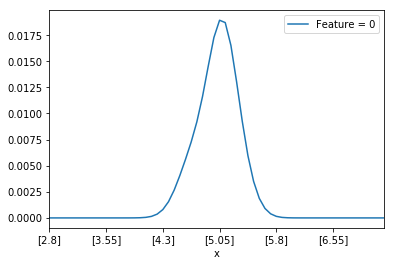

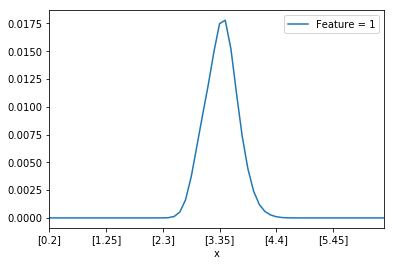

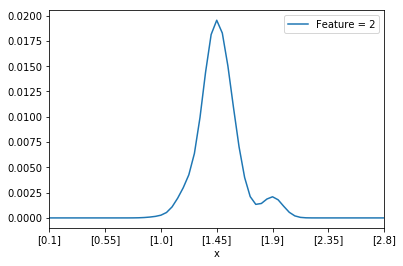

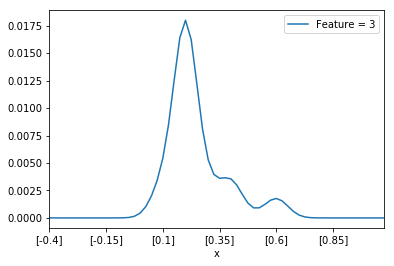

In [7]:

for i in range (len(featuresSetosa[0])):
    pz.testeGraficoParzen(i, featuresSetosa)
